**Problem Statement-** Perform analysis on Customer Churn for a Telecommunications Company Data to find out the reasons of high Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Content of the dataset
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

### importing dataset

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Data Preprocessing

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### lets handle white space in data

In [6]:
data=data.mask(data == ' ')

In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data.duplicated().sum()

0

#### Droping the null values 

In [9]:
data.dropna(axis=0,subset=["TotalCharges"], inplace=True)

In [10]:
data.shape

(7032, 21)

In [11]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### Customer id is not required for the EDA part

In [13]:
data.drop("customerID",axis=1,inplace=True)

# Feature Engineering

## Attribute

In [14]:
data['Tenure_Group'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72, 84],
                            labels=['<1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5-6 Years', '6+ Years'])

## Encoding

### Creating the list of categorical columns

In [15]:
data_cate = []
for i in data.columns:
  if(data[i].dtype == "object"):
    data_cate.append(i)

for col in data_cate:
    print(col, "-", data[col].unique())

gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No phone service' 'No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['No' 'Yes' 'No internet service']
StreamingTV - ['No' 'Yes' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges - ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn - ['No' 'Yes']


## Applying encoding

In [16]:
dict3 = {'Month-to-month':1, 'One year':6 ,'Two year':12}
nis_list = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

#applying the mapping for No internet service
for i in nis_list:
  data[i]= data[i].replace('No internet service','No')

#applying the mapping for No phone service
data["MultipleLines"] = data["MultipleLines"].replace('No phone service','No')

#applying the mapping for Contract
data['Contract'] = data['Contract'].map(dict3)

In [17]:
for col in data_cate:
    print(col, "-", data[col].unique())

gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes']
OnlineBackup - ['Yes' 'No']
DeviceProtection - ['No' 'Yes']
TechSupport - ['No' 'Yes']
StreamingTV - ['No' 'Yes']
StreamingMovies - ['No' 'Yes']
Contract - [ 1  6 12]
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges - ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn - ['No' 'Yes']


## Converting object to int type

In [18]:
data["Contract"] = data["Contract"].astype(int)

# Exploratory Data Analysis

In [19]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,1,Yes,Electronic check,29.85,29.85,No,<1 Year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,6,No,Mailed check,56.95,1889.5,No,2-3 Years
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,1,Yes,Mailed check,53.85,108.15,Yes,<1 Year
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,6,No,Bank transfer (automatic),42.30,1840.75,No,3-4 Years
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,1,Yes,Electronic check,70.70,151.65,Yes,<1 Year


### Monthly Charges vs Churn 

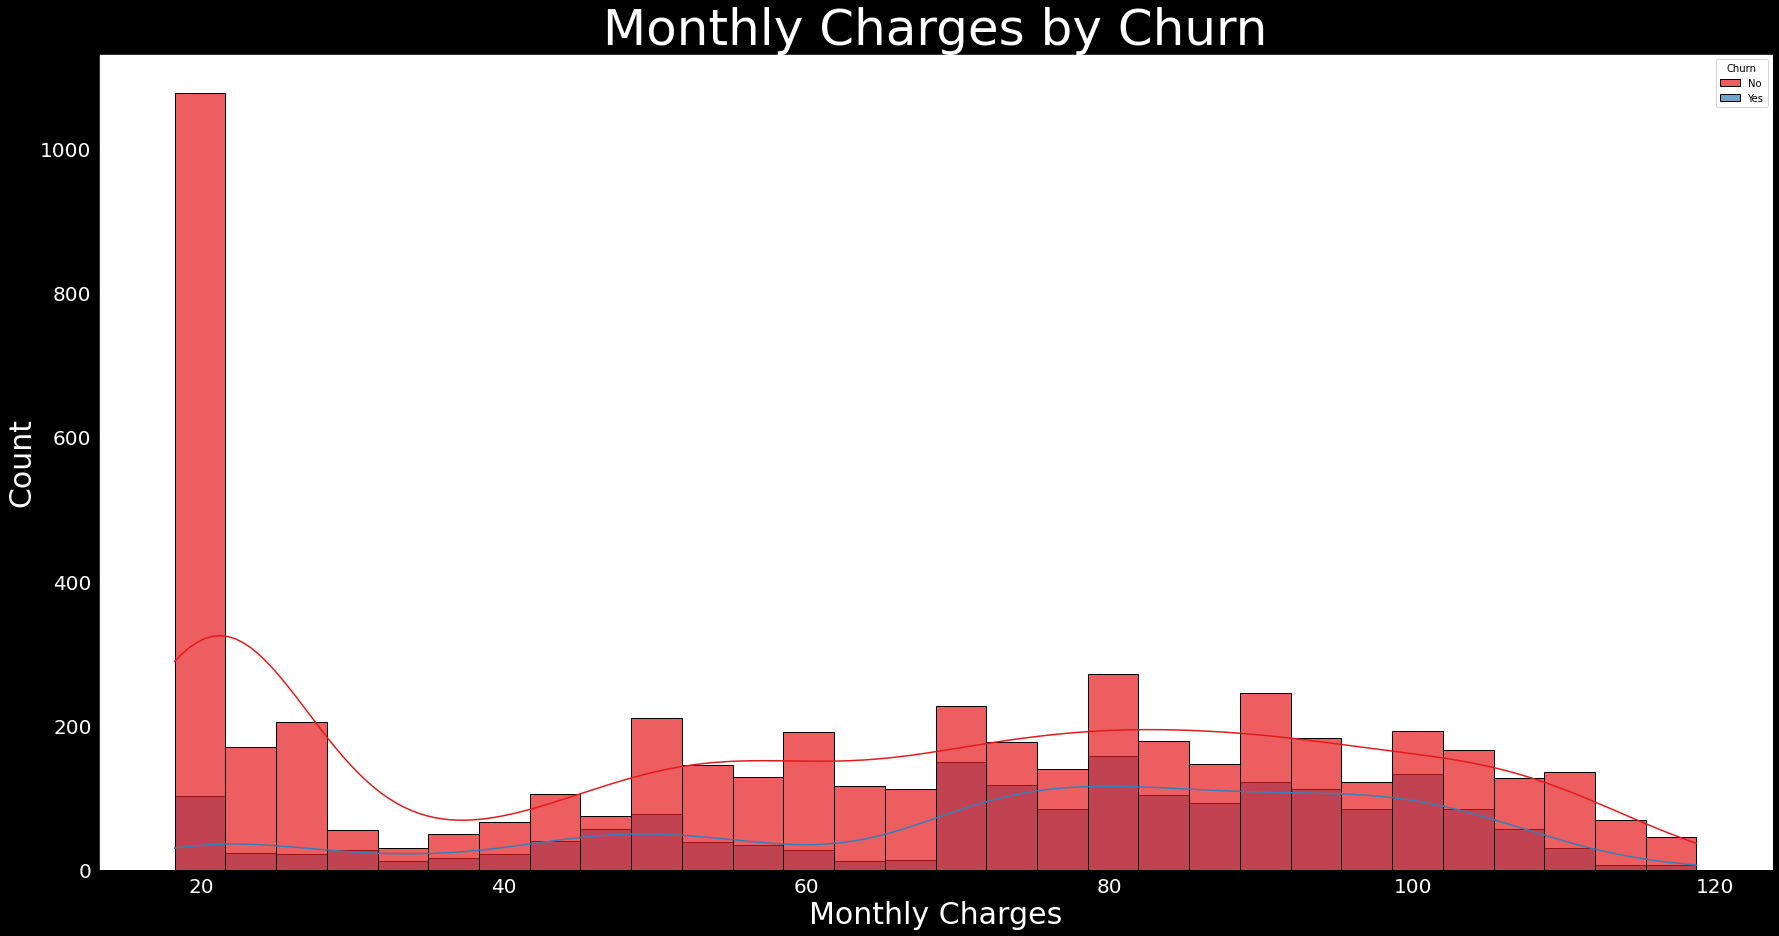

In [20]:

sns.set_palette("Set1")

plt.figure(figsize=(30,15), facecolor='black')
sh = sns.histplot(data=data, x="MonthlyCharges",hue="Churn", kde=True, bins=30, alpha=0.7)
plt.title("Monthly Charges by Churn", color='white',size=50)
plt.xlabel("Monthly Charges", color='white',size=30)
plt.ylabel("Count", color='white',size=30)
plt.xticks(color='white',size=20)
plt.yticks(color='white',size=20)

plt.subplots_adjust(wspace=0.3)
plt.show()

Insight: Churn is high when Monthly Charges are high

Text(0, 0.5, 'count')

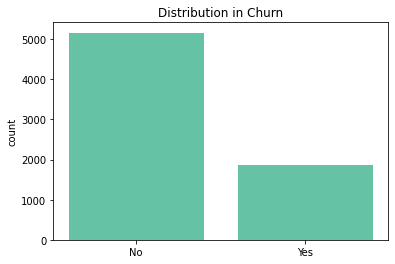

In [21]:
sns.set_palette("Set2")
feature_data = data['Churn'].value_counts()
plt.bar(feature_data.index,feature_data)
plt.title('Distribution in Churn')
plt.ylabel('count')

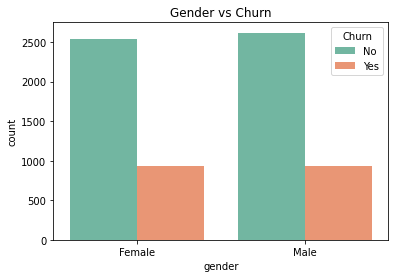

In [22]:
sns.set_palette("Set2")
sns.countplot(x="gender",hue='Churn',data=data)
plt.title("Gender vs Churn")
plt.show()

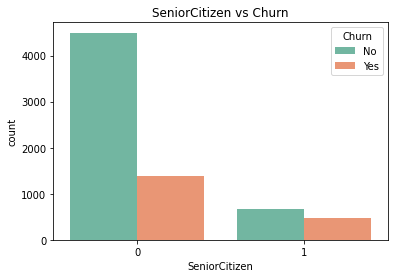

In [23]:
sns.set_palette("Set2")
sns.countplot(x="SeniorCitizen",hue='Churn',data=data)
plt.title("SeniorCitizen vs Churn")
plt.show()

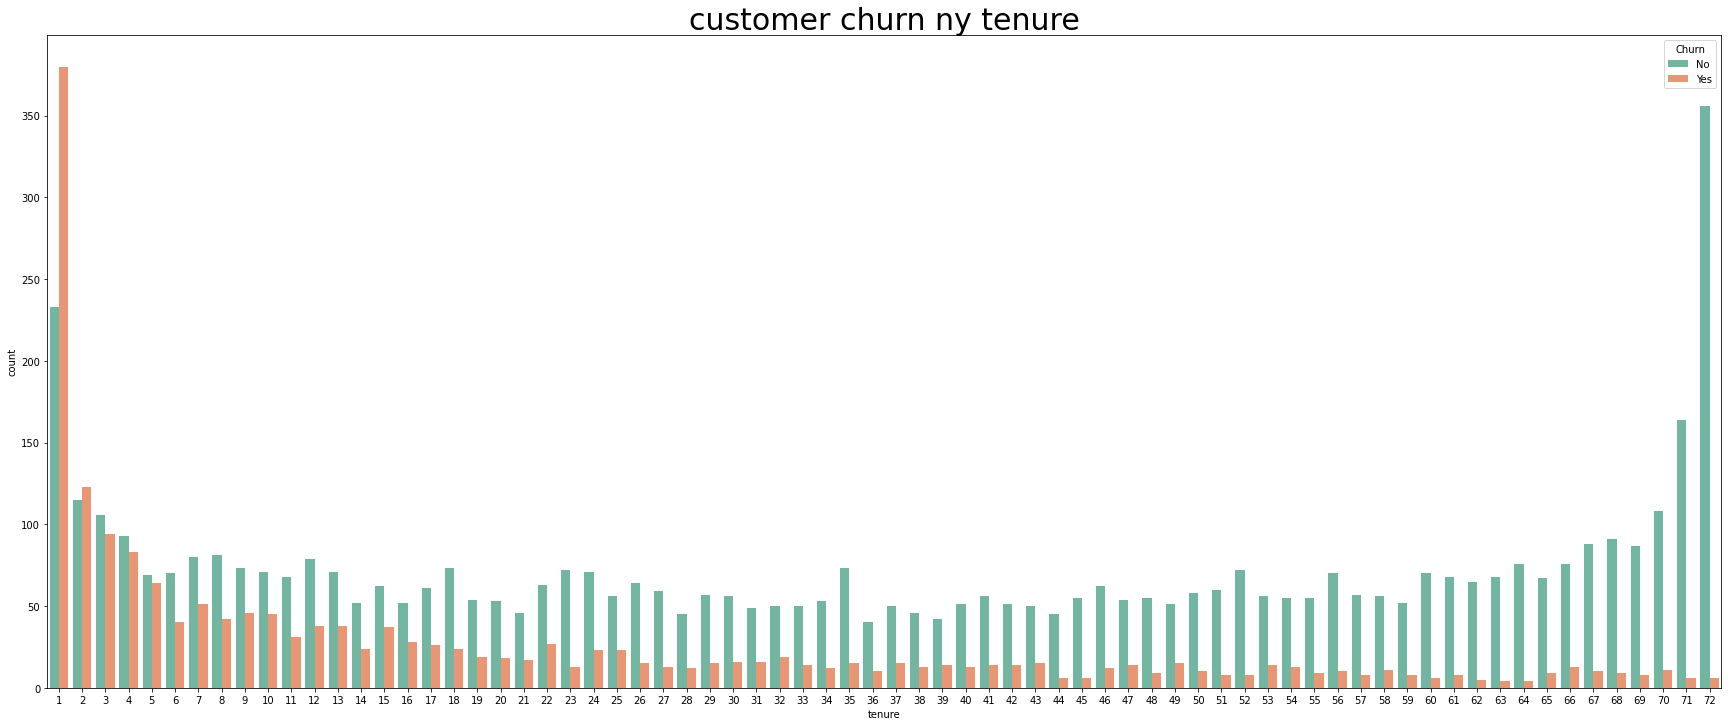

In [24]:
sns.set_palette("Set2")
plt.figure(figsize=(30,12))
sns.countplot(x="tenure",hue="Churn",data=data)
plt.title("customer churn ny tenure",size=30)
plt.show()

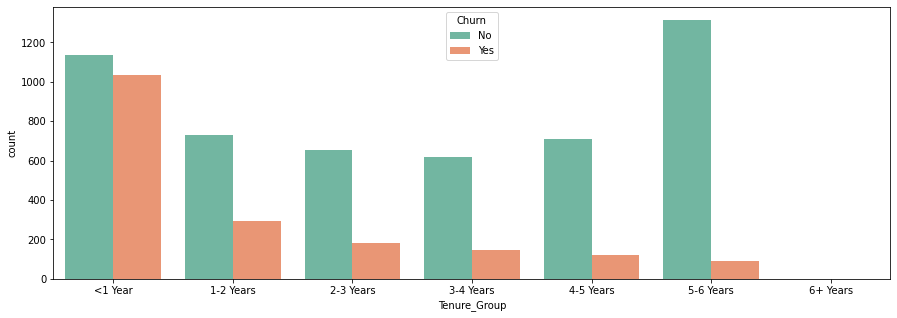

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x="Tenure_Group",hue='Churn',data=data)
plt.show()

Text(0.5, 1.0, 'Internet Service')

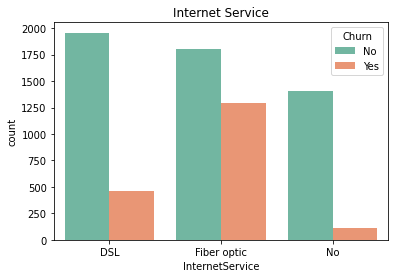

In [26]:
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Internet Service')

Text(0.5, 1.0, 'Contract')

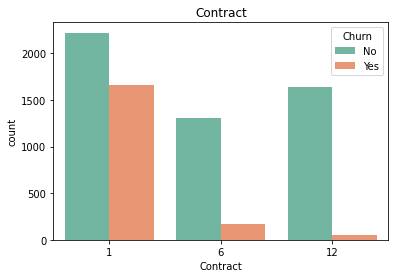

In [27]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Contract')

Text(0.5, 1.0, 'PhoneService')

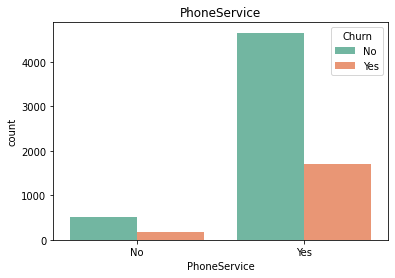

In [28]:
sns.countplot(x='PhoneService', hue='Churn', data=data)
plt.title('PhoneService')

Text(0.5, 1.0, 'PaymentMethod')

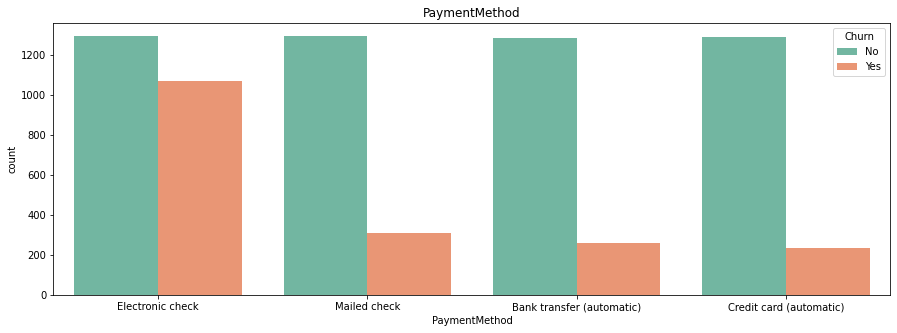

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('PaymentMethod')

Text(0.5, 1.0, 'TechSupport')

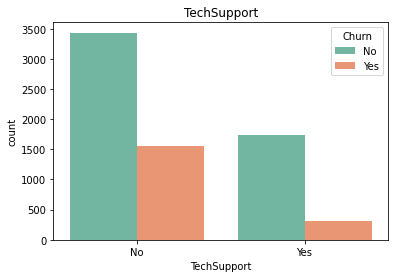

In [30]:
sns.countplot(x='TechSupport', hue='Churn', data=data)
plt.title('TechSupport')

Text(0.5, 1.0, 'PhoneService')

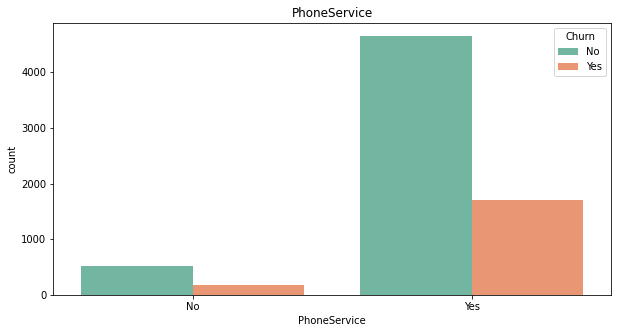

In [31]:
plt.figure(figsize=(10, 5))

sns.countplot(x='PhoneService', hue='Churn', data=data)
plt.title('PhoneService')

Text(0.5, 1.0, 'MultipleLines')

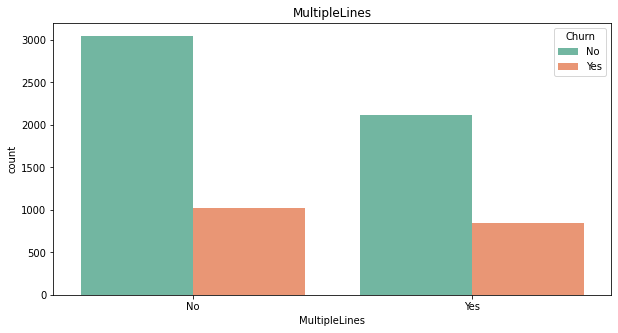

In [32]:
plt.figure(figsize=(10, 5))

sns.countplot(x='MultipleLines', hue='Churn', data=data)
plt.title('MultipleLines')

Text(0.5, 1.0, 'OnlineSecurity')

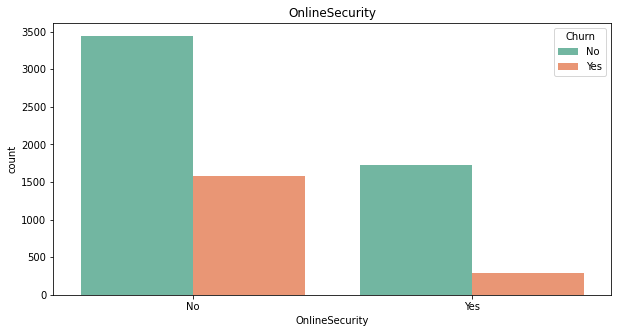

In [33]:
plt.figure(figsize=(10, 5))

sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.title('OnlineSecurity')

Text(0.5, 1.0, 'OnlineBackup')

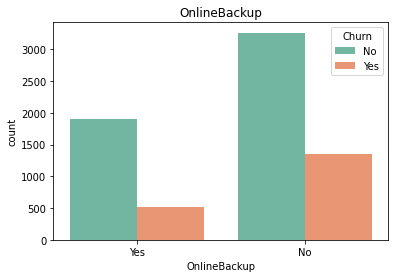

In [34]:
sns.countplot(x='OnlineBackup', hue='Churn', data=data)
plt.title('OnlineBackup')

Text(0.5, 1.0, 'DeviceProtection')

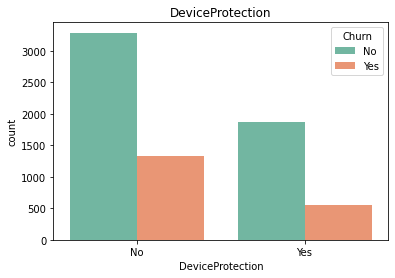

In [35]:
sns.countplot(x='DeviceProtection', hue='Churn', data=data)
plt.title('DeviceProtection')

Text(0.5, 1.0, 'TechSupport')

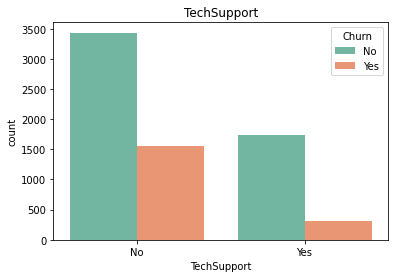

In [36]:
sns.countplot(x='TechSupport', hue='Churn', data=data)
plt.title('TechSupport')

Text(0.5, 1.0, 'StreamingTV')

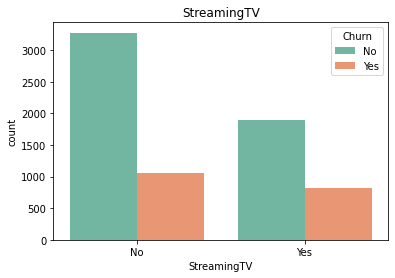

In [37]:
sns.countplot(x='StreamingTV', hue='Churn', data=data)
plt.title('StreamingTV')

Text(0.5, 1.0, 'StreamingMovies')

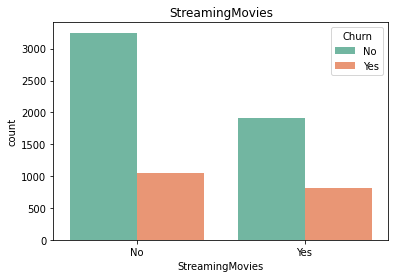

In [38]:
sns.countplot(x='StreamingMovies', hue='Churn', data=data)
plt.title('StreamingMovies')

Text(0.5, 1.0, 'PaperlessBilling')

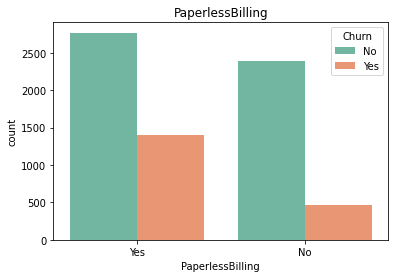

In [39]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=data)
plt.title('PaperlessBilling')

Text(0.5, 1.0, 'PaymentMethod')

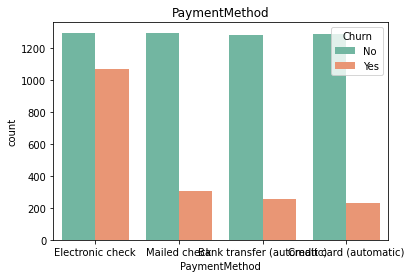

In [40]:
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('PaymentMethod')

#Analyze Tensure <1 Year


In [41]:
data_ten = data[data['Tenure_Group']== '<1 Year'] 

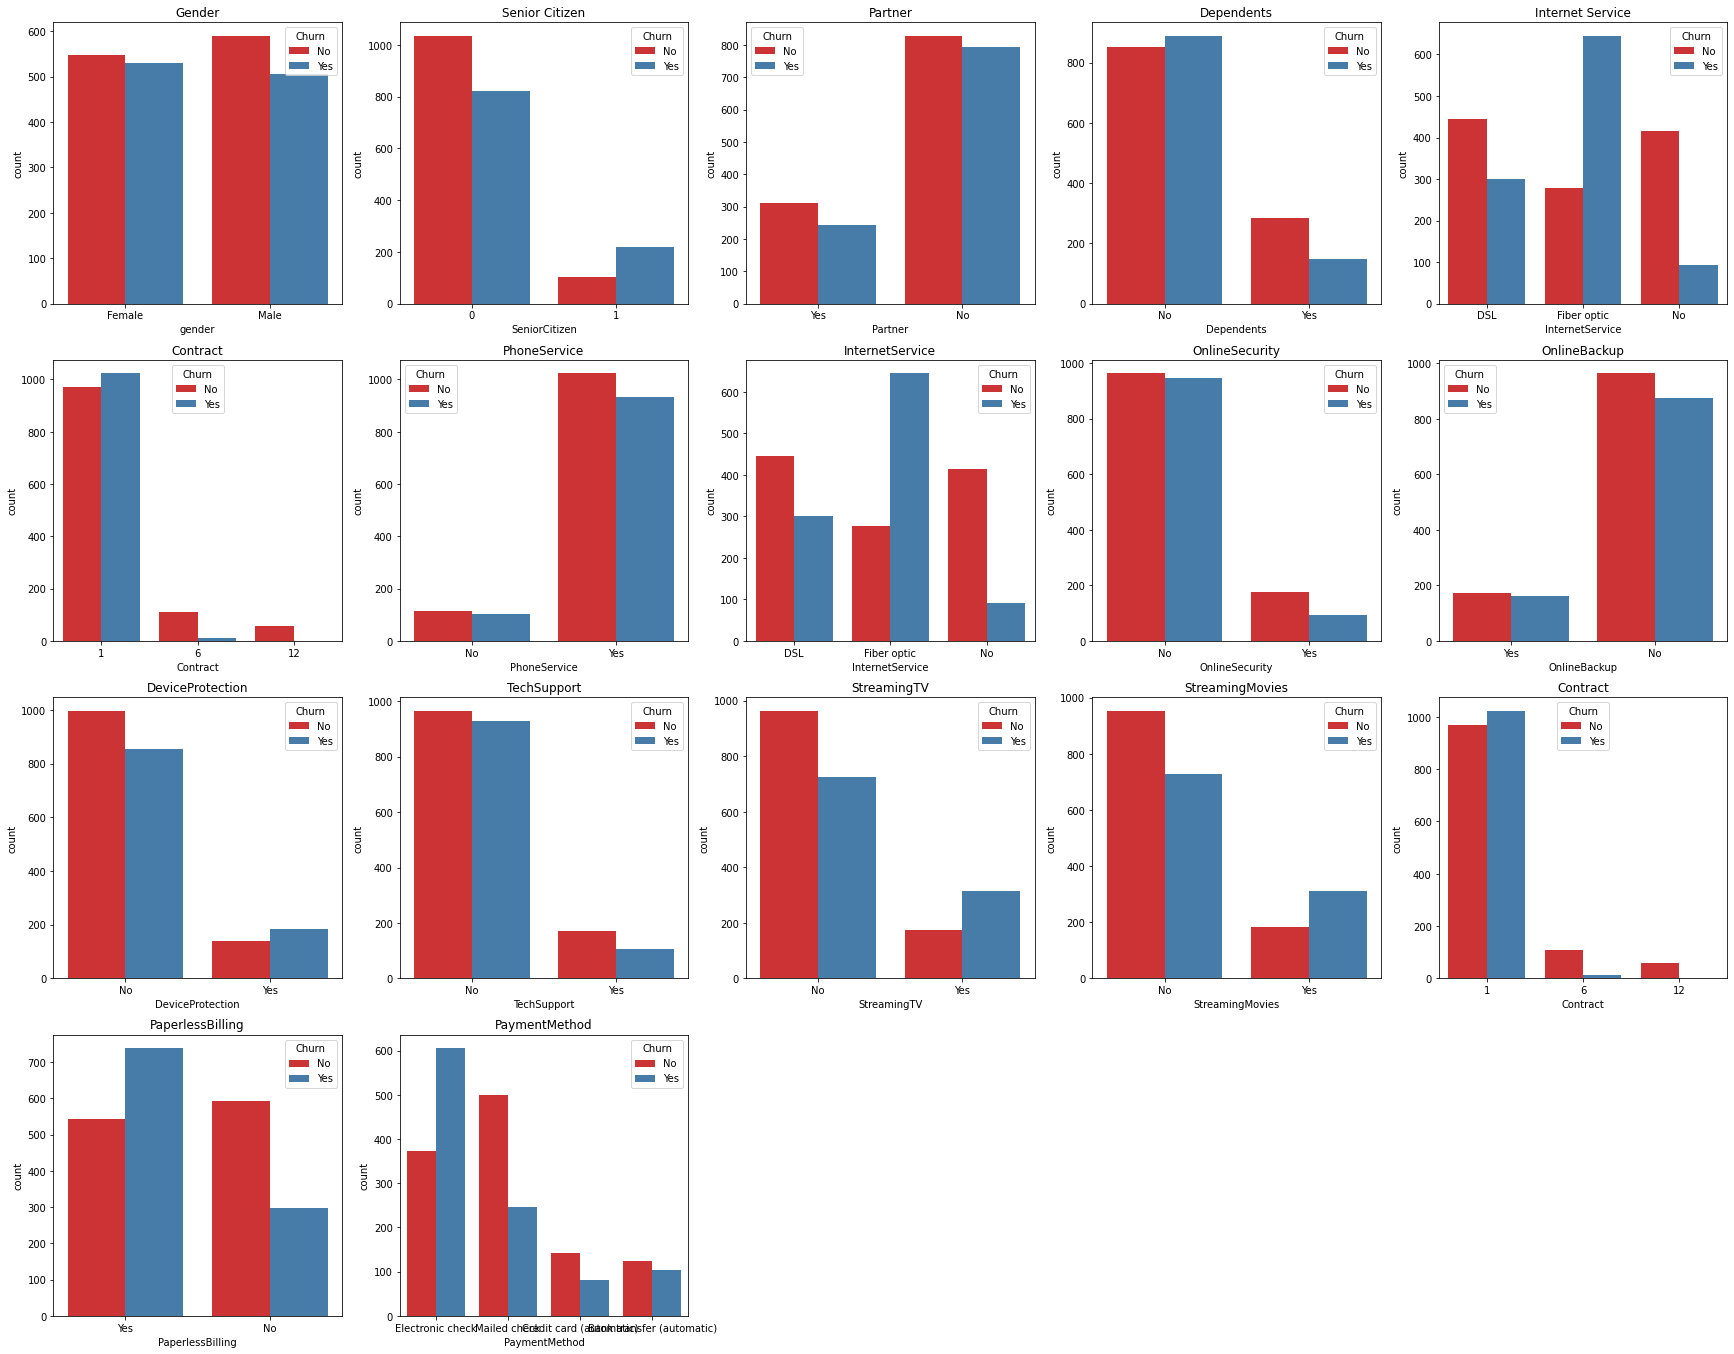

In [42]:
plt.figure(figsize=(30, 30))
sns.set_palette("Set1")
plt.subplot(5, 5, 1)
sns.countplot(x='gender', hue='Churn', data=data_ten)
plt.title('Gender')
plt.subplot(5, 5, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=data_ten)
plt.title('Senior Citizen')
plt.subplot(5, 5, 3)
sns.countplot(x='Partner', hue='Churn', data=data_ten)
plt.title('Partner')
plt.subplot(5, 5, 4)
sns.countplot(x='Dependents', hue='Churn', data=data_ten)
plt.title('Dependents')
plt.subplot(5, 5, 5)
sns.countplot(x='InternetService', hue='Churn', data=data_ten)
plt.title('Internet Service')
plt.subplot(5, 5, 6)
sns.countplot(x='Contract', hue='Churn', data=data_ten)
plt.title('Contract')
plt.subplot(5, 5, 7)
sns.countplot(x='PhoneService', hue='Churn', data=data_ten)
plt.title('PhoneService')
plt.subplot(5, 5, 8)
sns.countplot(x='InternetService', hue='Churn', data=data_ten)
plt.title('InternetService')
plt.subplot(5, 5, 9)
sns.countplot(x='OnlineSecurity', hue='Churn', data=data_ten)
plt.title('OnlineSecurity')
plt.subplot(5, 5, 10)
sns.countplot(x='OnlineBackup', hue='Churn', data=data_ten)
plt.title('OnlineBackup')
plt.subplot(5, 5, 11)
sns.countplot(x='DeviceProtection', hue='Churn', data=data_ten)
plt.title('DeviceProtection')
plt.subplot(5, 5, 12)
sns.countplot(x='TechSupport', hue='Churn', data=data_ten)
plt.title('TechSupport')
plt.subplot(5, 5, 13)
sns.countplot(x='StreamingTV', hue='Churn', data=data_ten)
plt.title('StreamingTV')
plt.subplot(5, 5, 14)
sns.countplot(x='StreamingMovies', hue='Churn', data=data_ten)
plt.title('StreamingMovies')
plt.subplot(5, 5, 15)
sns.countplot(x='Contract', hue='Churn', data=data_ten)
plt.title('Contract')
plt.subplot(5, 5, 16)
sns.countplot(x='PaperlessBilling', hue='Churn', data=data_ten)
plt.title('PaperlessBilling')
plt.subplot(5, 5, 17)
sns.countplot(x='PaymentMethod', hue='Churn', data=data_ten)
plt.title('PaymentMethod')
plt.show()

#Model Building

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   object  
 6   MultipleLines     7032 non-null   object  
 7   InternetService   7032 non-null   object  
 8   OnlineSecurity    7032 non-null   object  
 9   OnlineBackup      7032 non-null   object  
 10  DeviceProtection  7032 non-null   object  
 11  TechSupport       7032 non-null   object  
 12  StreamingTV       7032 non-null   object  
 13  StreamingMovies   7032 non-null   object  
 14  Contract          7032 non-null   int64   
 15  PaperlessBilling  7032 non-null   object  
 16  PaymentMethod     7032 n

In [44]:
#dict1 = {'Yes':1,'No':0}
#dict_3 = {'Electronic check':1, 'Mailed check':2, 'Bank transfer (automatic)':3,
#'Credit card (automatic)':4}


#applying encoding for this list
#for i in list_yes_no:
  #data[i] = data[i].map(dict1)

#applying encoding for Payment mode
#data['PaymentMethod']=data['PaymentMethod'].map(dict_3)

In [45]:
dict0 = {"Yes":1,"No":0}
dict10 = {"No":0,"Yes":1}
data["Partner"] = data["Partner"].map(dict0)
data["Dependents"] = data["Dependents"].map(dict10)
data["PhoneService"] = data["PhoneService"].map(dict0)
data["MultipleLines"] = data["MultipleLines"].map(dict0)
data["OnlineSecurity"] = data["OnlineSecurity"].map(dict0)
data["OnlineBackup"] = data["OnlineBackup"].map(dict0)
data["DeviceProtection"] = data["DeviceProtection"].map(dict0)
data["TechSupport"] = data["TechSupport"].map(dict0)
data["StreamingTV"] = data["StreamingTV"].map(dict0)
data["PaperlessBilling"] = data["PaperlessBilling"].map(dict0)
data["Churn"] = data["Churn"].map(dict0)
data["StreamingMovies"] = data["StreamingMovies"].map(dict0)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['PaymentMethod'] =le.fit_transform(data['PaymentMethod'])
data['InternetService']=le.fit_transform(data['InternetService'])

dict01 = {'Male':1,'Female':0}
data["gender"]= data["gender"].map(dict01)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   int64   
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   int64   
 3   Dependents        7032 non-null   int64   
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   int64   
 6   MultipleLines     7032 non-null   int64   
 7   InternetService   7032 non-null   int64   
 8   OnlineSecurity    7032 non-null   int64   
 9   OnlineBackup      7032 non-null   int64   
 10  DeviceProtection  7032 non-null   int64   
 11  TechSupport       7032 non-null   int64   
 12  StreamingTV       7032 non-null   int64   
 13  StreamingMovies   7032 non-null   int64   
 14  Contract          7032 non-null   int64   
 15  PaperlessBilling  7032 non-null   int64   
 16  PaymentMethod     7032 n

In [48]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.872582,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,4.682452,0.592719,1.573237,64.798208,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.737271,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,4.546383,0.491363,1.067504,30.085974,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,35.587500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,2.000000,89.862500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,3.000000,118.750000,1.000000


##Correlation

In [49]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.002236,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,-0.000252,-0.011902,0.016942,-0.013779,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.032160,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.140824,0.156258,-0.038158,0.219874,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000513,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.292625,-0.013957,-0.156232,0.097825,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.044030,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.239297,-0.110131,-0.041989,-0.112343,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,-0.029835,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.672854,0.004823,-0.370087,0.246862,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,0.387266,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003182,0.016696,-0.005499,0.248033,0.011691
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.011346,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.108511,0.163746,-0.171240,0.490912,0.040033
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,0.011346,1.000000,-0.392174,-0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.100753,-0.138166,0.084504,-0.322173,-0.047097
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,-0.392174,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.243034,-0.004051,-0.149112,0.296447,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,-0.313708,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.152686,0.127056,-0.170720,0.441529,-0.082307


In [50]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.02,-0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,0.02,-0.01,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.14,-0.03,-0.04,0.07,0.06,-0.06,0.11,0.12,-0.14,0.16,-0.04,0.22,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.14,0.14,0.15,0.12,0.12,0.12,0.29,-0.01,-0.16,0.10,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.08,0.02,0.01,0.06,-0.02,-0.04,0.24,-0.11,-0.04,-0.11,-0.16
tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.33,-0.03,0.33,0.36,0.36,0.33,0.28,0.29,0.67,0.00,-0.37,0.25,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,0.28,0.39,-0.09,-0.05,-0.07,-0.10,-0.02,-0.03,0.00,0.02,-0.01,0.25,0.01
MultipleLines,-0.01,0.14,0.14,-0.02,0.33,0.28,1.00,0.01,0.10,0.20,0.20,0.10,0.26,0.26,0.11,0.16,-0.17,0.49,0.04
InternetService,-0.00,-0.03,0.00,0.04,-0.03,0.39,0.01,1.00,-0.39,-0.31,-0.31,-0.39,-0.24,-0.25,0.10,-0.14,0.08,-0.32,-0.05
OnlineSecurity,-0.02,-0.04,0.14,0.08,0.33,-0.09,0.10,-0.39,1.00,0.28,0.27,0.35,0.18,0.19,0.24,-0.00,-0.15,0.30,-0.17
OnlineBackup,-0.01,0.07,0.14,0.02,0.36,-0.05,0.20,-0.31,0.28,1.00,0.30,0.29,0.28,0.27,0.15,0.13,-0.17,0.44,-0.08


In [51]:
X= data.drop(["tenure","Churn","Tenure_Group","TotalCharges","DeviceProtection","StreamingMovies","StreamingTV","PaperlessBilling","OnlineBackup"],axis=1)

In [52]:
y = data['Churn']

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
     

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [57]:
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier(n_neighbors=5)
nb=GaussianNB()
lr= LogisticRegression()
     

In [58]:

acc = []
pre = []
re = []
models = [rfc,dtc,knc,nb,lr]
models_name = ['RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','LogisticRegression']

for i in models:
  i.fit(X_train_sc,y_train)
  y_pred= i.predict(X_test_sc)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)

  acc.append(accuracy)
  pre.append(precision)
  re.append(recall)

In [59]:
m1 = pd.DataFrame()
m1['Models']=models_name
m1['Accuracy']= acc
m1['Precision']= pre
m1['Recall']= re

In [60]:
m1

,Models,Accuracy,Precision,Recall
0,RandomForestClassifier,0.747690,0.522293,0.444444
1,DecisionTreeClassifier,0.703625,0.436508,0.447154
2,KNeighborsClassifier,0.754087,0.534743,0.479675
3,GaussianNB,0.754797,0.526201,0.653117
4,LogisticRegression,0.780384,0.597403,0.498645


Logistic Regression

In [61]:
lr.fit(X_train_sc,y_train)
y_pred = lr.predict(X_test_sc)

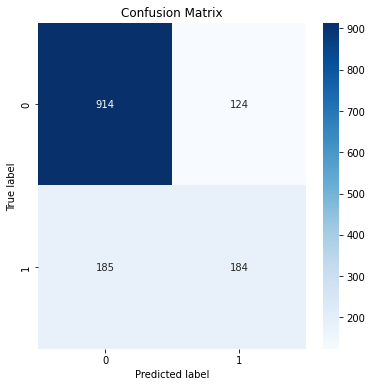

In [62]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1038
           1       0.60      0.50      0.54       369

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Model result-  Our logistic regression model achieved an accuracy of 78% on the testing data, which indicates that it is a good predictor of churn and as per the business problem we can also change Threshold value for your model.

#Conclusion

Based on our analysis, we recommend that the company consider offering discounts to customers with high monthly charges, and to focus on retaining customers with long contract periods and high-speed internet service. Our logistic regression model can be used to identify customers who are at high risk of leaving and to develop targeted retention strategies.



*   Offer discounts to customers with high monthly charges[trial for tech support, Online Security, Online Backup , Device Protection and Streaming].

*   focus on retaining customers with long contract periods.
*   Focus on imporving customer experience with Electronic check and Mailed    check transcations.
*   Fiber optic[internet serivce] speed need to improve.
*   long-term customers usually do not get influenced much by competitors
*   long-term customers tend to buy more.
*   we can see the high churn in tenure with less than a year. So company should launch some offers to early users. 



**Check out my Brief Report on Customer Churn Analysis** - https://drive.google.com/file/d/1Poy0rUU4FyQ5RYAaZ6-N7QuQWAcEZpTp/view?usp=share_link